In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

np.random.seed(42)

#import data and remove null values
truist_data_raw = pd.read_csv("truist_data_clean.csv")
truist_data_raw.dropna(inplace=True)


#create a data frame with the pitch names converted into numbers
pitch_type_numbers = pd.get_dummies(truist_data_raw[["pitch_name"]])
pitch_type_numbers

#create a dtaa frame from the raw data frame with the pitch_name column dropped
truist_data_clean = truist_data_raw.drop(["pitch_name"], axis=1)
truist_data_clean

#create a new data frame by combining the 2 new data frames
truist_data_full = pd.concat([truist_data_clean, pitch_type_numbers], axis="columns")
truist_data_full

#create an x and y for the regression model
X = truist_data_full.drop("hit_distance_sc", axis=1)
y = truist_data_full["hit_distance_sc"]

#create, train, and test the model
model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train.values, y_train)
model.score(X_test, y_test);

c:\Users\seanc\Documents\sample_project_1\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [2]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter serverextension enable voila --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling: voila
- Writing config: C:\Users\seanc\Documents\sample_project_1\env\etc\jupyter
    - Validating...
      voila 0.2.16 ok


In [3]:
four_seam = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0])
changeup = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0])
curveball = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0])
cutter = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0])
fastball = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0])
knuckleball = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0])
sinker = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0])
slider = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0])
split_finger = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1])

In [4]:
def at_bat_data (launch_speed, launch_angle, pitch_speed, pitch_name):
    ls = launch_speed
    la = launch_angle
    ps = pitch_speed
    pn = pitch_name
    part1 = np.array([ls, la, ps])
    ab_data = np.concatenate((part1, pn), axis=None)
    return ab_data
    

In [5]:
def hist_graph (x):
    fig, ax = plt.subplots(figsize = (20,5))
    hist = ax.hist(x)
    ax.set(title="Launch Angle Occurances",xlabel="Launch Angle", ylabel="Occurances");
    return hist


def pie_graph (x):
    fig, ax = plt.subplots(figsize = (10,10))
    pie = ax.pie(x, labels = ['4-Seam', 'Slider', 'Sinker', 'Chnageup', 'Curveball', 'Cutter', 'Knuckle Ball', 'SplitFinger', 'Fastball'], autopct='%1.1f%%')
    return pie
    

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
x_label = widgets.Label(value="Exit Velocity:")
x = launch_speed_select = widgets.FloatSlider(min=10, max=120, value=80, step=.1,)
y_label = widgets.Label(value="Launch Angle:")
y = launch_angle_select = widgets.FloatSlider(min=-100, max=100, value=0, step=.1,)
z_label = widgets.Label(value="Pitch Speed:")
z = pitch_speed_select = widgets.FloatSlider(min=45, max=105, value=80, step=.1,)
drop_down_label = widgets.Label(value="Select Pitch:")
drop_down = widgets.Dropdown(
    options=[('Four Seam Fastball'), ('Changeup'), ('Curveball'), ('Cutter'),
            ('Fastball'), ('Knuckleball'), ('Sinker'), ('Slider'), ('Split Finger')],
)

# Truist Field Batted Ball Distance Predictor
### This application can predict the distance at ball would have been hit at Truist Field
Scroll down to the bottom of the page to begin using the application

### Graphs

The data used for this application can be found at Baseball Savant (https://baseballsavant.mlb.com/). 

The 2 graphs bellow are based on the data used for this application.

The first graph is a histogram that with the launch angle on the x-axis and the number of occurances for that launch angle on the y-axis.

The second graph is a pie chart that shows the percentage of each pitch thrown in the data used.

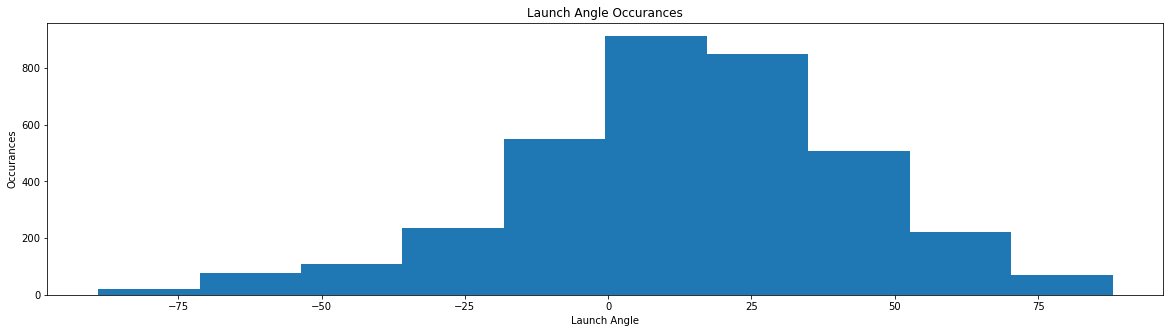

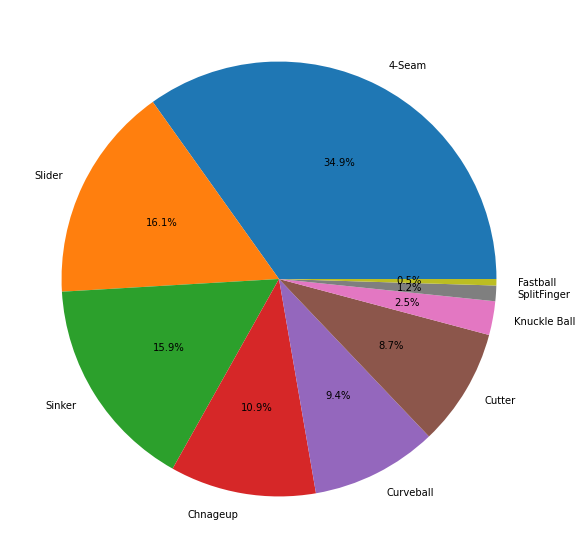

In [7]:
hist_graph(truist_data_raw.launch_angle);

pie_graph(truist_data_raw.pitch_name.value_counts());

### How to use this application:
1. Using the sliders, set the exit velocity, launch angle, and pitch speed.
2. Using the drop-down box, select the pitch.
3. Press button

You will be given a read out of the distance the ball is predicted to travel. You will also be shown a set of 5 graphs; left field, left-center field, deep center, right-center, and right field. The horizontal line on each graph represents the outfield fence location and the dot is the final distance the ball has traveled. If the dot is to the left of the line, the ball is predicted to have stayed in the field of play. When the dot is to the right of the line, the ball is predicted to be a home run.

In [8]:
widgets.VBox([x_label, x, y_label, y, z_label, z, drop_down_label, drop_down])

In [9]:
from IPython.display import clear_output
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)


def on_button_clicked(b):
    pitch_name = 'blank'
    with output:
        clear_output(wait=True)
        if drop_down.value == 'Four Seam Fastball':
            pitch_name = four_seam
        if drop_down.value == 'Changeup':
            pitch_name = changeup
        if drop_down.value == 'Curveball':
            pitch_name = curveball
        if drop_down.value == 'Cutter':
            pitch_name = cutter
        if drop_down.value == 'Fastball':
            pitch_name = fastball
        if drop_down.value == 'Knuckleball':
            pitch_name = knuckleball
        if drop_down.value == 'Sinker':
            pitch_name = sinker
        if drop_down.value == 'Slider':
            pitch_name = slider
        if drop_down.value == 'Split Finger':
            pitch_name = split_finger
        testing  = at_bat_data(x.value, y.value, z.value, pitch_name)
        Distance = model.predict([testing])
        ab_graph = {'Distance in Feet': [Distance[0]], 'Launch Angle': [y.value], 'col3': [drop_down.value]}
        ab_dif = pd.DataFrame(data=ab_graph)
        print ('Distance of the ball hit is:', Distance[0], 'feet.')
        print ('')
        
        fig, left = plt.subplots(figsize=(16, 6))
        ab_dif.plot(kind='scatter',
            x="Distance in Feet",
            y="Launch Angle",
            ax=left);
        left.axvline(x = 335);
        print ('Left field is 335 feet.')
        plt.show()
        
        
        fig, left_center = plt.subplots(figsize=(16, 6))
        ab_dif.plot(kind='scatter',
            x="Distance in Feet",
            y="Launch Angle",
            ax=left_center);
        left_center.axvline(x = 375);
        print ('Left-center field is 375 feet.')
        plt.show()
        
        
        fig, deep_center = plt.subplots(figsize=(16, 6))
        ab_dif.plot(kind='scatter',
            x="Distance in Feet",
            y="Launch Angle",
            ax=deep_center);
        deep_center.axvline(x = 402);
        print ('Deep center field is 402 feet.')
        plt.show()
        
        
        fig, right_center = plt.subplots(figsize=(16, 6))
        ab_dif.plot(kind='scatter',
            x="Distance in Feet",
            y="Launch Angle",
            ax=right_center);
        right_center.axvline(x = 375);
        print ('Right-center field is 375 feet.')
        plt.show()
        
        
        fig, right = plt.subplots(figsize=(16, 6))
        ab_dif.plot(kind='scatter',
            x="Distance in Feet",
            y="Launch Angle",
            ax=right);
        right.axvline(x = 325);
        print ('Right field is 325 feet.')
        plt.show() 
        
        dt_string = datetime.datetime.now()
        write = '{} - Distance in Feet: {}, Exit Velo: {}, Launch Angle: {}, Pitch: {}\n'.format(dt_string, str(Distance[0]), str(x.value), str(y.value),str(drop_down.value) )
        file = open('logging.txt', 'a')
        file.write(write)

        
button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()